**Introduction**


This is a dataset I got from a Yale Econometrics class that is taught using R. The class has it's own R package, *AER*, full of datasets for the class assignments. I dont't know R as well as Python, and was having a hard time following along with the R tutorials, because they're older and things in R have changed. I decided to try this on my own in Python, and apply a little machine learning to it. I downloaded the dataset as a csv from the R package and this is my attempt.

In [38]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('Affairs.csv')

In [5]:
data.head()

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3


In [6]:
data['gender'] = np.where(data['gender']== 'male', 1, 0)
data['children'] = np.where(data['children']== 'yes', 1, 0)
data['affair'] = np.where(data['affairs'] == 0, 0, 1)

In [7]:
data.head()

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,affair
0,4,0,1,37.0,10.00,0,3,18,7,4,0
1,5,0,0,27.0,4.00,0,4,14,6,4,0
2,11,0,0,32.0,15.00,1,1,12,1,4,0
3,16,0,1,57.0,15.00,1,5,18,6,5,0
4,23,0,1,22.0,0.75,0,2,17,6,3,0


In [8]:
import matplotlib.pyplot as plt

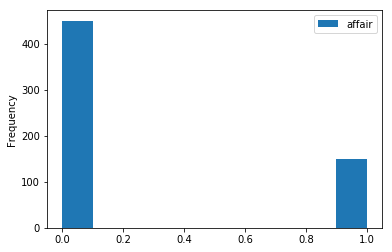

In [9]:
affairs_by_children = data.plot.hist(x='children', y='affair')

This chart shows that more people without children reported having affairs, versus people that have children.

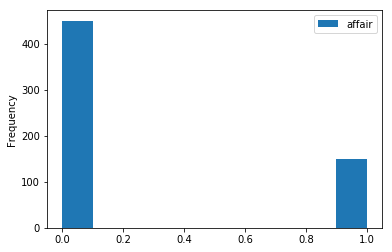

In [10]:
affairs_by_gender = data.plot.hist(x='gender', y='affair')

This says more women are reporting having affairs than men. Keep in mind that more women responded to the survey overall.

In [11]:
data['gender'].value_counts()

0    315
1    286
Name: gender, dtype: int64

In [12]:
data['affairs'].value_counts()

0     451
7      42
12     38
1      34
3      19
2      17
Name: affairs, dtype: int64

In [13]:
data['gender'].value_counts()

0    315
1    286
Name: gender, dtype: int64

In [14]:
data.columns

Index(['Unnamed: 0', 'affairs', 'gender', 'age', 'yearsmarried', 'children',
       'religiousness', 'education', 'occupation', 'rating', 'affair'],
      dtype='object')

In [15]:
df = data.drop(['Unnamed: 0'], axis=1)


In [16]:
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,affair
0,0,1,37.0,10.00,0,3,18,7,4,0
1,0,0,27.0,4.00,0,4,14,6,4,0
2,0,0,32.0,15.00,1,1,12,1,4,0
3,0,1,57.0,15.00,1,5,18,6,5,0
4,0,1,22.0,0.75,0,2,17,6,3,0


In [17]:
from statsmodels.formula.api import ols

results = ols('affairs ~ gender + yearsmarried + age + rating + occupation + children + religiousness + education', df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     11.23
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           7.47e-15
Time:                        13:49:33   Log-Likelihood:                -1527.2
No. Observations:                 601   AIC:                             3072.
Df Residuals:                     592   BIC:                             3112.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.8720      1.137      5.162      0.000       3.638       8.106
gender            0.0541      0.300      0.180      0.857      -0.536       0.644
yearsmarried      0.1695      0.041      4.111      0.000       0.089       0.250
age              -0.0510      0.023     -2.254      0.025      -0.095      -0.007
rating           -0.7119      0.120     -5.932      0.000      -0.948      -0.476
occupation        0.1049      0.089      1.180      0.238      -0.070       0.279
children         -0.1426      0.350     -0.407      0.684      -0.830       0.545
religiousness    -0.4776      0.112     -4.275      0.000      -0.697      -0.258
education        -0.0137      0.064     -0.214      0.830      -0.140       0.112
==============================================================================
Omnibus:                      234.745   Durbin-Watson:                   1.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              694.539
Skew:                           1.956   Prob(JB):                    1.52e-151
Kurtosis:                       6.526   Cond. No.                         353.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So our top 3 most important predictors of someone having an affair is 1) Rating, or how they rate their own relationship, 2) Religiousness, and 3) Years Married.

Rating and Religiousness, as they increase, decrease the likelihood of someone having and affair. As years married increases, so does the chance of an affair, however, it rises at a slower clip than rating or religiousness.

In [18]:
top4model = ols('affairs ~ yearsmarried + rating + religiousness + children', df).fit()
top4model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     20.83
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           4.36e-16
Time:                        13:49:33   Log-Likelihood:                -1530.3
No. Observations:                 601   AIC:                             3071.
Df Residuals:                     596   BIC:                             3093.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.0167      0.636      7.893      0.000       3.768       6.265
yearsmarried      0.1073      0.029      3.750      0.000       0.051       0.163
rating           -0.7051      0.119     -5.926      0.000      -0.939      -0.471
religiousness    -0.4953      0.111     -4.443      0.000      -0.714      -0.276
children         -0.1708      0.343     -0.498      0.619      -0.844       0.503
==============================================================================
Omnibus:                      234.426   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              687.074
Skew:                           1.960   Prob(JB):                    6.37e-150
Kurtosis:                       6.475   Cond. No.                         55.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
X = df[['gender', 'yearsmarried', 'age', 'rating', 'occupation', 'children', 'religiousness', 'education']]

In [21]:
y = df['affair']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=0)  

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])  
coeff_df  

,Coefficient
gender,0.169034
yearsmarried,0.009480
age,-0.003270
rating,-0.073190
occupation,-0.005287
children,0.032665
religiousness,-0.047106
education,-0.001899


In [26]:
y_pred = lr.predict(X_test)

In [27]:
pred_act = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred_act.head()

,Actual,Predicted
596,1,0.317835
52,0,0.100420
190,0,0.163779
165,0,0.206494
344,0,0.269609


In looking at this comparison between predicted and actual results, the low R2 score is confirmed in low predictive power.

Because my predictive power is so low, I'm going to say that if it's predicted to be .40 or higher then they are classified as "will have an affair"

In [28]:
pred_act['classify'] = np.where(pred_act['Predicted']>.40, 1, 0)

In [29]:
pred_act['accurate'] = np.where(pred_act['classify']==pred_act['Actual'], 1, 0)

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
pred_act['accurate'].value_counts()

1    315
0    106
Name: accurate, dtype: int64

So with our very low bar of .40 or higher, we get a 74.8% correct classification, which I can live with, but I'm going to see if I can transform a predictor to increase my predictive power and adjusted R2. But first, I want to run my own relationship into this model.


In [32]:


sarah = (0.169034*0) + (0.009480*3.5) - (0.003270*24) - (0.073190*4) - (0.005287*5)+ (0.032665*0) -(0.047106*1)
-(0.001899*16)



-0.030384

So my model would not classify me as someone that would have an affair in 1969

In [33]:
evan = (0.169034*1) + (0.009480*3.5) - (0.003270*24) - (0.073190*4) - (0.005287*14)+ (0.032665*0) -(0.047106*1.5)
-(0.001899*2)

-0.003798

My partner Evan's score is lower than mine, meaning he's less likely than I am to have an affair in this model.

In [34]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [35]:
classifier = knn(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
y_pred2 = classifier.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))  

[[298   9]
 [110   4]]
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       307
           1       0.31      0.04      0.06       114

   micro avg       0.72      0.72      0.72       421
   macro avg       0.52      0.50      0.45       421
weighted avg       0.62      0.72      0.62       421



using K-Nearest Neighbors with 5 clusters, we are able to get a much higher accuracy rate without specifying a low cutoff.